## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to calc this. 

<font face color='red'>This code is broken again!!</font>

In [1]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

## Remove orientation measurements that are not found as contacts

In [2]:
import pandas as pd
mname='hams2' 

contacts=pd.read_csv('../test_data2/output/'+mname+'_contacts4.csv',",")
actual_cpts=set(contacts['formation'])

#contacts2=contacts.loc[contacts['formation'].isin(actual_cpts)]  
#contacts2.to_csv('../test_data2/output/'+mname+'_contacts5.csv',index=False)
 
orientations=pd.read_csv('../test_data2/output/'+mname+'_orientations.csv',",")
orientations2=orientations.loc[orientations['formation'].isin(actual_cpts)]  
orientations2.to_csv('../test_data2/output/'+mname+'_orientations2.csv',index=False)


In [3]:
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
minx=500057+5000    #left hams
maxx=603028-5000    #right
miny=7455348+5000   #bottom
maxy=7567953-5000   #top

# extents=[   np.round_(geom_rp['coordinates'][0][0][0]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][2][0]-step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][1][1]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][0][1]-step_in, decimals=-3),
#             model_base,1200]

#print(extents)
#gp.init_data(geo_model, extent=[minx, maxx, miny, maxy, -3000, 1200],
gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, -3000, 1200],
    resolution = (50,50,50), 
      #path_o = './test_data/output/hams2_orientations.txt',
      path_o = '../test_data2/output/hams2_orientations2.csv',
      path_i = '../test_data2/output/hams2_contacts4.csv', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [4]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()

P__HAb_cib       105
A_HAm_cib         61
A_HAS_xsl_ci      60
A_FOj_xs_b        54
A_HAd_kd          44
P__HAw_fr         42
P__HAo_ci         27
A_FOu_bbo         25
P__HAj_xci_od     25
A_FOh_xs_f        19
P__SKq_stq        18
A_FOo_bbo         16
A_FOp_bs          15
P__TK_s           14
P__TKa_xs_k       14
P__WYm_sp         13
P__TKo_stq         7
A_FOr_b            6
P__SKb_bb          2
P__WYa_st          2
P__TKk_sf          1
basement           0
Name: surface, dtype: int64

## Show example orientations

In [5]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A_FOj_xs_b       21
A_FOh_xs_f       20
P__HAb_cib       16
A_HAm_cib        13
A_FOu_bbo         9
A_FOp_bs          7
A_HAS_xsl_ci      6
P__SKq_stq        5
P__TKk_sf         3
A_HAd_kd          3
P__HAj_xci_od     3
P__TK_s           2
P__HAo_ci         1
P__WYm_sp         1
P__WYa_st         1
P__SKb_bb         0
P__HAw_fr         0
P__TKo_stq        0
P__TKa_xs_k       0
A_FOr_b           0
A_FOo_bbo         0
basement          0
Name: surface, dtype: int64

## Plot some of this data

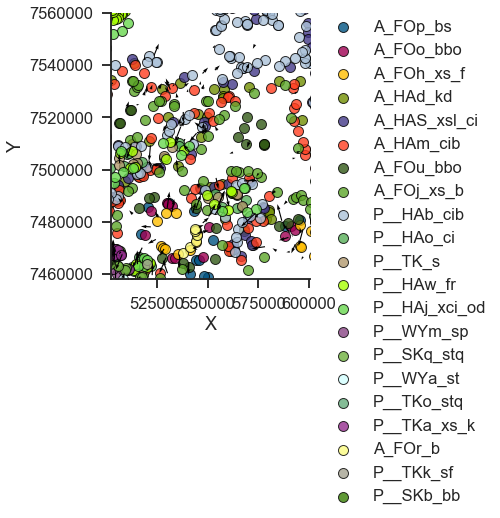

In [6]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
Cropped raster to geo_model.grid.extent.
[ 502536  600652 7458000 7560000] [115 110]
storing converted file...
Active grids: ['regular' 'topography']


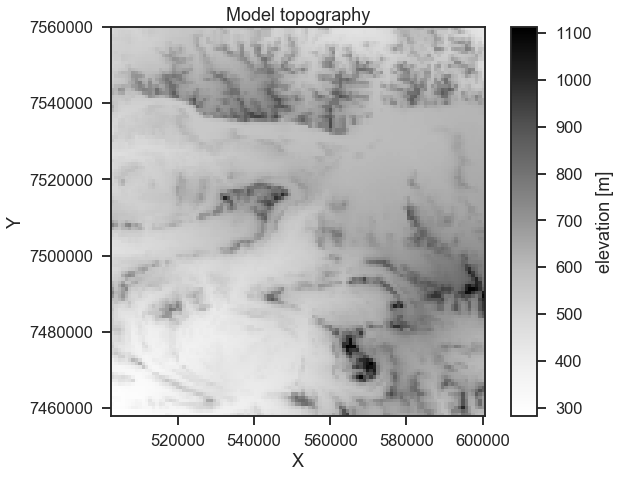

In [7]:
print(os.getcwd())
fp = '../test_data2/dtm/hams2_dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)

## Load stratigraphic Series

f=open('../test_data2/tmp/hams2_groups.csv',"r")
contents =f.readlines()
f.close

# # This is not necessary all data objects are created and linked to geo_model on the init call!!!

# # faults = gp.Faults()
# # series = gp.Series(faults)
# # series.df

ngroups=(contents[0]).split(" ")
ngroups=int(ngroups[1])
groups=[]

for i in range (1,int(ngroups)+1):
     groups.append(contents[i].replace("\n",""))
#     geo_model.add_series(contents[i].replace("\n",""))

# geo_model.delete_series(['Default series', 'Basement'])



## Load surfaces and assign to series

In [8]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_FOp_bs,Default series,1,False,#015482,1
1,A_FOo_bbo,Default series,2,False,#9f0052,2
2,A_FOh_xs_f,Default series,3,False,#ffbe00,3
3,A_HAd_kd,Default series,4,False,#728f02,4
4,A_HAS_xsl_ci,Default series,5,False,#443988,5
5,A_HAm_cib,Default series,6,False,#ff3f20,6
6,A_FOu_bbo,Default series,7,False,#325916,7
7,A_FOj_xs_b,Default series,8,False,#5DA629,8
8,P__HAb_cib,Default series,9,False,#acc2d9,9
9,P__HAo_ci,Default series,10,False,#56ae57,10


In [9]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


i=1
f=open('../test_data2/tmp/'+groups[i]+'.csv',"r")
contents =f.readlines()
nformations=str(contents[0])
nformations=nformations.split(" ")
nformations=int(nformations[1].replace("\n",""))
f.close    
#print(nformations)
for j in range (1,int(nformations)+1):
    print(nformations,j,groups[i],contents[j].replace("\n","").replace("-","_"))
    #geo_model.add_surfaces(contents[j].replace("\n",""))
    #d={groups[i]:contents[j].replace("\n","")}
    gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n","").replace("-","_"))},
        set_series=True, remove_unused_series=True)
   # geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )


In [10]:
print("ngroups=",ngroups,groups)
ngroups=4
for i in range(0,ngroups):
    f=open('../test_data2/tmp/'+groups[i]+'.csv',"r")
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))
    f.close    
    #print(nformations)
    for j in range (1,int(nformations)+1):
        print(nformations,j,groups[i],contents[j].replace("\n","").replace("-","_"))
        #geo_model.add_surfaces(contents[j].replace("\n",""))
        #d={groups[i]:contents[j].replace("\n","")}
        gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n","").replace("-","_"))},
            set_series=True, remove_unused_series=True)
       # geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )


ngroups= 8 ['Wyloo_Group', 'Shingle_Creek_Group', 'Turee_Creek_Group', 'Hamersley_Group', 'Fortescue_Group', 'A_s_PMI', 'A_s_PRK', 'A_b_PRK']
3 1 Wyloo_Group P__WYa_st
3 2 Wyloo_Group P__WYm_sp
3 3 Wyloo_Group P__WYd_kd
2 1 Shingle_Creek_Group P__SKq_stq
2 2 Shingle_Creek_Group P__SKb_bb
4 1 Turee_Creek_Group P__TK_s
4 2 Turee_Creek_Group P__TKa_xs_k
4 3 Turee_Creek_Group P__TKo_stq
4 4 Turee_Creek_Group P__TKk_sf
7 1 Hamersley_Group P__HAo_ci
7 2 Hamersley_Group P__HAw_fr
7 3 Hamersley_Group P__HAj_xci_od
7 4 Hamersley_Group P__HAb_cib
7 5 Hamersley_Group A_HAS_xsl_ci
7 6 Hamersley_Group A_HAd_kd
7 7 Hamersley_Group A_HAm_cib


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_FOp_bs,Default series,1,False,#015482,1
1,A_FOo_bbo,Default series,2,False,#9f0052,2
2,A_FOh_xs_f,Default series,3,False,#ffbe00,3
6,A_FOu_bbo,Default series,4,False,#325916,4
7,A_FOj_xs_b,Default series,5,False,#5DA629,5
18,A_FOr_b,Default series,6,False,#fcfc81,6
13,P__WYm_sp,Wyloo_Group,1,False,#894585,7
15,P__WYa_st,Wyloo_Group,2,False,#d4ffff,8
20,P__SKb_bb,Shingle_Creek_Group,1,False,#388004,9
14,P__SKq_stq,Shingle_Creek_Group,2,False,#70b23f,10


In [12]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,561294.769513,7.455348e+06,640,0.543706,0.250100,0.499903,A_FOp_bs,Default series,1,1,1.000000e-08
1,550300.471121,7.458638e+06,476,0.494546,0.264813,0.499170,A_FOp_bs,Default series,1,1,1.000000e-08
2,548389.838343,7.459381e+06,454,0.486003,0.268133,0.499072,A_FOp_bs,Default series,1,1,1.000000e-08
3,541428.338990,7.459826e+06,447,0.454876,0.270123,0.499040,A_FOp_bs,Default series,1,1,1.000000e-08
18,603028.000000,7.481171e+06,658,0.730312,0.365565,0.499984,A_FOp_bs,Default series,1,1,1.000000e-08
19,595429.580811,7.480531e+06,645,0.696336,0.362703,0.499926,A_FOp_bs,Default series,1,1,1.000000e-08
20,587977.949448,7.478184e+06,692,0.663017,0.352210,0.500136,A_FOp_bs,Default series,1,1,1.000000e-08
526,530722.381819,7.487374e+06,455,0.407005,0.393299,0.499076,A_FOp_bs,Default series,1,1,1.000000e-08
527,520870.908223,7.485702e+06,706,0.362955,0.385827,0.500198,A_FOp_bs,Default series,1,1,1.000000e-08
528,517221.150655,7.475150e+06,407,0.346636,0.338645,0.498861,A_FOp_bs,Default series,1,1,1.000000e-08


In [13]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
16,513032.899812,7.482922e+06,442,0.327909,0.373396,0.499018,-1.731837e-01,0.192340,0.965926,15,318,1,A_FOp_bs,Default series,1,1,0.01
52,540784.731185,7.464544e+06,408,0.451998,0.291220,0.498866,-3.364090e-02,-0.641907,0.766044,40,183,1,A_FOp_bs,Default series,1,1,0.01
54,529500.738026,7.466242e+06,490,0.401543,0.298813,0.499233,-3.313588e-01,-0.780632,0.529919,58,203,1,A_FOp_bs,Default series,1,1,0.01
60,550491.005745,7.482013e+06,524,0.495398,0.369329,0.499385,3.596699e-01,0.622967,0.694658,46,30,1,A_FOp_bs,Default series,1,1,0.01
64,544268.348172,7.484998e+06,544,0.467574,0.382678,0.499474,2.493997e-01,0.724309,0.642788,50,19,1,A_FOp_bs,Default series,1,1,0.01
85,570632.369052,7.510870e+06,638,0.585458,0.498359,0.499894,-1.225691e-01,-0.319303,0.939693,20,201,1,A_FOp_bs,Default series,1,1,0.01
92,583959.610576,7.468823e+06,708,0.645050,0.310351,0.500207,-2.028928e-01,0.131760,0.970296,14,303,1,A_FOp_bs,Default series,1,1,0.01
0,530083.185332,7.485330e+06,415,0.404147,0.384159,0.498897,1.140039e-01,0.811180,0.573576,55,8,1,A_FOh_xs_f,Default series,3,1,0.01
1,532466.058612,7.483852e+06,419,0.414802,0.377550,0.498915,1.116189e-01,0.633022,0.766044,40,10,1,A_FOh_xs_f,Default series,3,1,0.01
15,522004.807902,7.478031e+06,389,0.368025,0.351524,0.498781,-4.993148e-01,0.026168,0.866025,30,273,1,A_FOh_xs_f,Default series,3,1,0.01


## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [14]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float 32

geo_model.additional_data.options.df['dtype'] = 'float32'
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

gp.compute_model(geo_model)
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

### Float64

In [15]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [16]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [17]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,21
number series,5
number surfaces per series,"[6, 2, 2, 4, 7]"
len surfaces surface_points,"[15, 16, 19, 25, 54, 6, 13, 2, 2, 18, 2, 7, 14..."
len series surface_points,"[135, 15, 20, 37, 364]"
len series orientations,"[57, 2, 5, 5, 42]"


## Calculate Model

In [18]:
gp.compute_model(geo_model)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [14. 14. 14. ...  1.  1.  1.] 

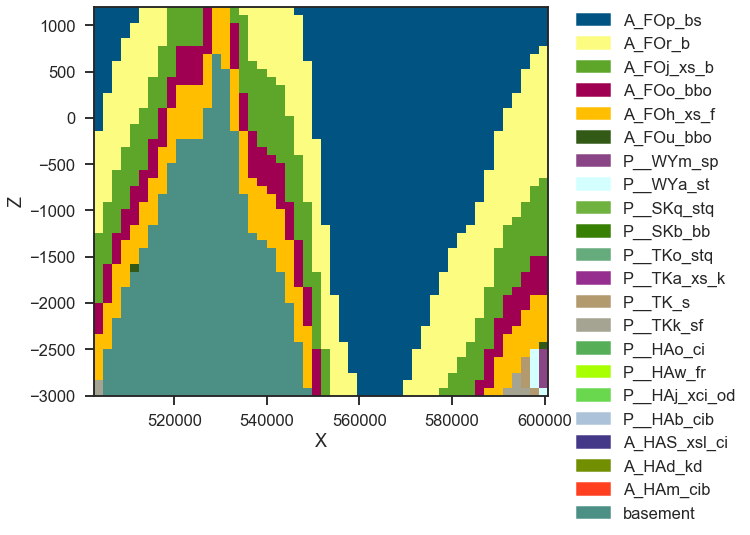

In [19]:
gp.plot.plot_section(geo_model, ve=20)

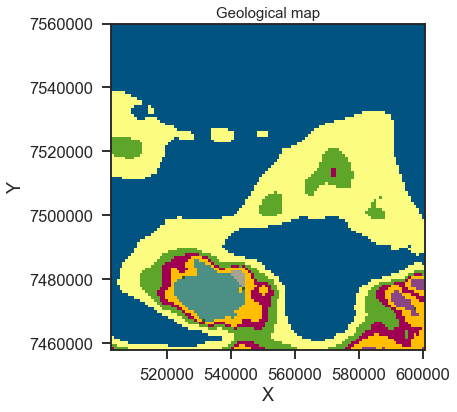

In [20]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

## Extract surfaces to visualize in 3D renderers

In [21]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [22]:
gp.plot.plot_3D(geo_model, render_data=False)

closing vtk


## Export model to vtk files

In [23]:
from gempy import plot
gp.plot.export_to_vtk(geo_model, path='.\\vtk\\', name=mname+'.vtk', voxels=False, block=None, surfaces=True)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))


True